In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

In [106]:
df = pd.read_csv('marketing_data.csv')

In [107]:
print(df.head())
  

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0            

In [108]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [109]:
print(df.describe())

                 ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

In [110]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()


In [111]:
print(df.Income)

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object


In [112]:
# Remove dollar sign and commas from Income column and convert to float
df['Income'] = df['Income'].str.replace('[$,]', '', regex=True).astype(float)
print(df['Income'].head())

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64


In [113]:
# Check for missing values
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [114]:
# Impute missing values in 'Income' with the mean
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

In [115]:
# Create Age column assuming the current year is 2014 as the latest in Dt_Customer is 2014
df['Age'] = 2014 - df['Year_Birth']

In [116]:
#Total Children at home
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [117]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,0,1,0,SP,44,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,0,1,1,0,CA,53,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,0,0,US,56,1
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,0,0,AUS,47,2
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,1,0,0,0,0,1,0,SP,25,1


In [118]:
# Total Spendings
spend_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spendings'] = df[spend_columns].sum(axis=1)

In [119]:
# Total purchase
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchase'] = df[purchase_columns].sum(axis=1)

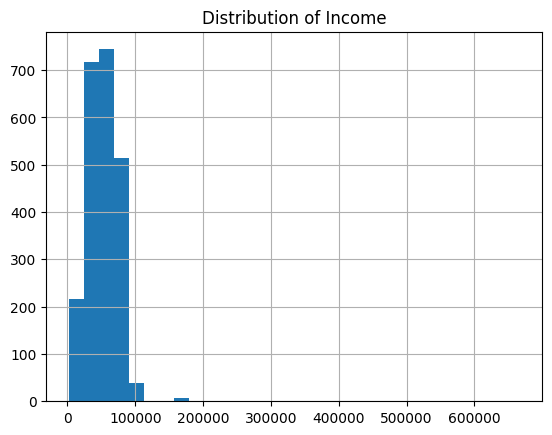

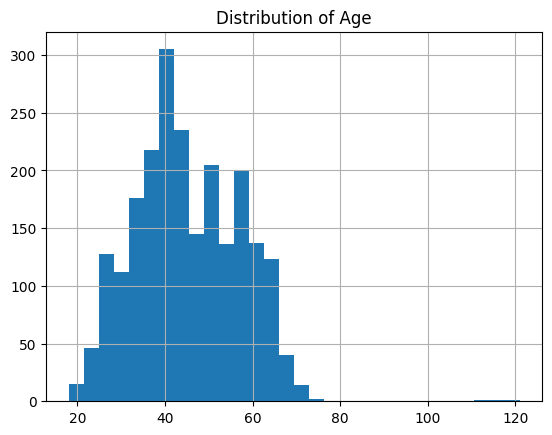

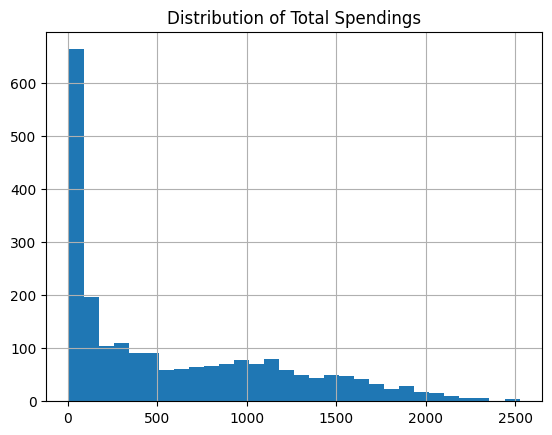

In [120]:
# Check Distribution of Total Spendings
df['Income'].hist(bins=30)
plt.title('Distribution of Income')
plt.show()

df['Age'].hist(bins=30)
plt.title('Distribution of Age')
plt.show()

df['Total_Spendings'].hist(bins=30)
plt.title('Distribution of Total Spendings')
plt.show()    

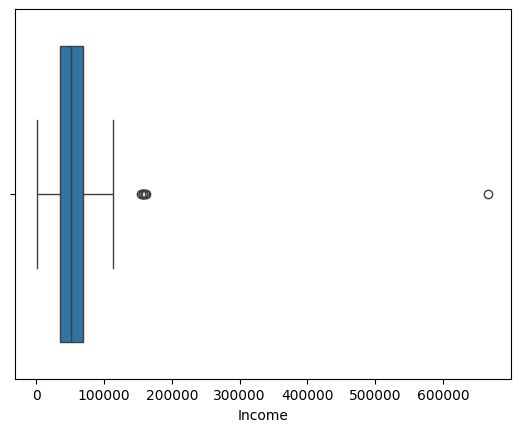

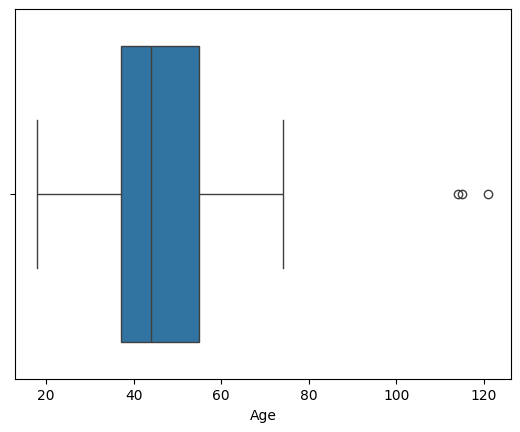

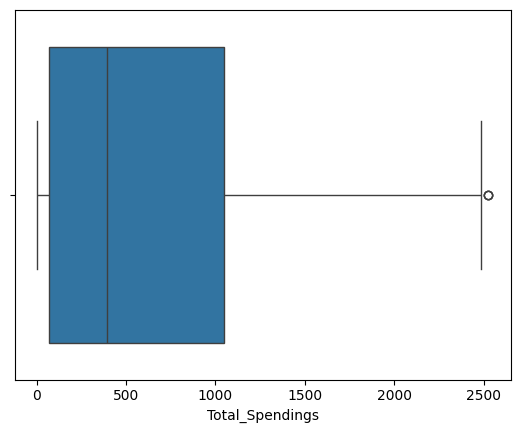

In [121]:
sns.boxplot(x=df['Income'])
plt.show()

sns.boxplot(x=df['Age'])
plt.show()

sns.boxplot(x=df['Total_Spendings'])
plt.show()  

In [122]:
# Ordinal (if you decide order: e.g., 'Basic' < '2n Cycle' < 'Graduation' < 'Master' < 'PhD')
education_order = {'Basic':1, '2n Cycle':2, 'Graduation':3, 'Master':4, 'PhD':5}
df['Education_Ordinal'] = df['Education'].map(education_order)

# One-hot encoding for Marital_Status
df = pd.get_dummies(df, columns=['Marital_Status'])


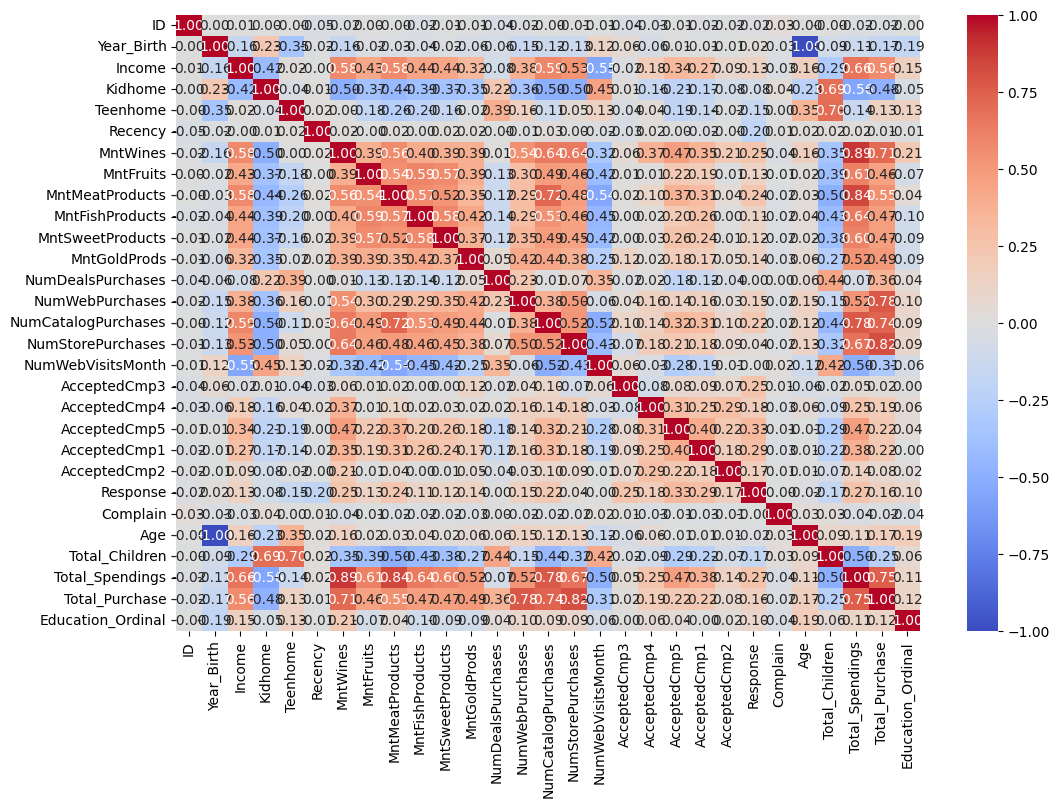

In [123]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


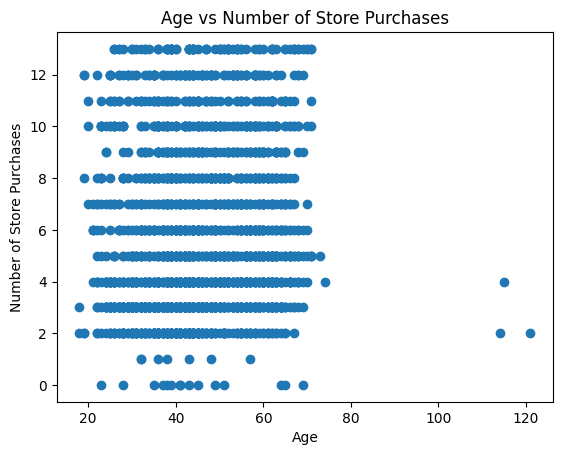

In [124]:
#Older people are not as tech-savvy and probably prefer shopping in-store.

plt.scatter(df['Age'], df['NumStorePurchases'])
plt.xlabel('Age')
plt.ylabel('Number of Store Purchases')
plt.title('Age vs Number of Store Purchases')
plt.show()

In [125]:
corr = df['Age'].corr(df['NumStorePurchases'])
print(f"Correlation between Age and Number of Store Purchases: {corr:.2f}")

Correlation between Age and Number of Store Purchases: 0.13


The correlation is 0.13, its positive but not really high to be significant
Lets Try grouped correlation

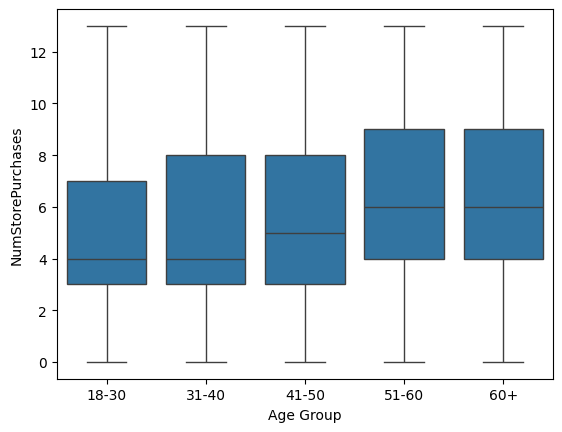

Age Group
18-30    5.365759
31-40    5.399660
41-50    5.619414
51-60    6.334737
60+      6.567669
Name: NumStorePurchases, dtype: float64


C:\Users\NESA\AppData\Local\Temp\ipykernel_14772\4024988370.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Age Group')['NumStorePurchases'].mean())


In [126]:
df['Age Group'] = pd.cut(df['Age'], bins=[18,30,40,50,60,100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

sns.boxplot(x='Age Group', y='NumStorePurchases', data=df)
plt.show()

print(df.groupby('Age Group')['NumStorePurchases'].mean())

In [127]:
from scipy.stats import kruskal

# Prepare data for test
grouped = [g['NumStorePurchases'].values for _, g in df.groupby('Age Group')]
stat, p = kruskal(*grouped)
print(f"Kruskal-Wallis test p-value: {p:.4f}")


Kruskal-Wallis test p-value: 0.0000


C:\Users\NESA\AppData\Local\Temp\ipykernel_14772\1723266526.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = [g['NumStorePurchases'].values for _, g in df.groupby('Age Group')]


P value of 0.0 shows that the hypothesis may be correct. But are they buying more?

In [128]:
print(df.groupby('Age Group')['NumStorePurchases'].mean())


Age Group
18-30    5.365759
31-40    5.399660
41-50    5.619414
51-60    6.334737
60+      6.567669
Name: NumStorePurchases, dtype: float64


C:\Users\NESA\AppData\Local\Temp\ipykernel_14772\3813584172.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Age Group')['NumStorePurchases'].mean())


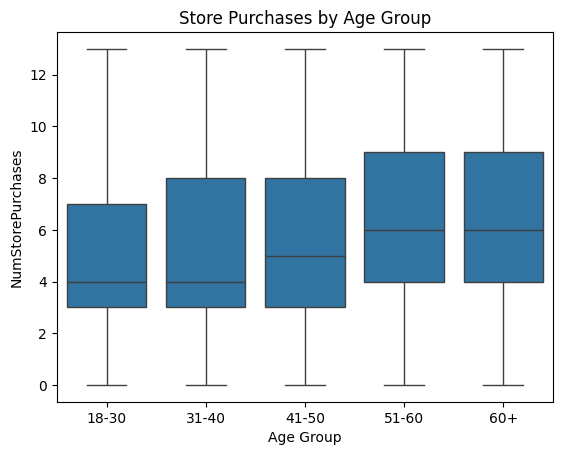

In [129]:
sns.boxplot(x='Age Group', y='NumStorePurchases', data=df)
plt.title("Store Purchases by Age Group")
plt.show()


The older people are buying more and the in store purchase mean value is higher. So hypothesis is correct

2. Customers with kids probably have less time to visit a store and would prefer to shop online.


In [130]:
df.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Education_Ordinal,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age Group
0,1826,1970,Graduation,84835.0,0,0,6/16/14,0,189,104,...,3,False,False,True,False,False,False,False,False,41-50
1,1,1961,Graduation,57091.0,0,0,6/15/14,0,464,5,...,3,False,False,False,False,True,False,False,False,51-60
2,10476,1958,Graduation,67267.0,0,1,5/13/14,0,134,11,...,3,False,False,False,True,False,False,False,False,51-60
3,1386,1967,Graduation,32474.0,1,1,5/11/14,0,10,0,...,3,False,False,False,False,False,True,False,False,41-50
4,5371,1989,Graduation,21474.0,1,0,4/8/14,0,6,16,...,3,False,False,False,False,True,False,False,False,18-30


In [131]:
# Split Customers Into Two Groups
with_kids = df[df['Total_Children'] > 0]
without_kids = df[df['Total_Children'] == 0]    

In [132]:
print("Mean web purchases with kids:", with_kids['NumWebPurchases'].mean())
print("Mean web purchases without kids:", without_kids['NumWebPurchases'].mean())

Mean web purchases with kids: 3.9619225967540572
Mean web purchases without kids: 4.393416927899686


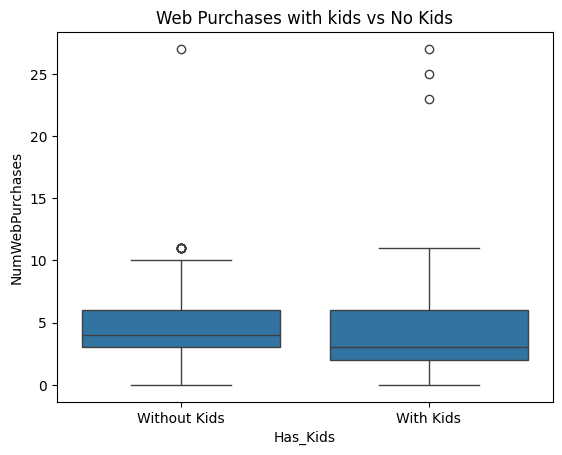

In [133]:
df['Has_Kids'] = np.where(df['Total_Children'] > 0, 'With Kids', 'Without Kids')
sns.boxplot(x='Has_Kids', y='NumWebPurchases', data=df)
plt.title("Web Purchases with kids vs No Kids")
plt.show()

The Hypothesis seems to be wrong

3. Other distribution channels may cannibalize sales at the store.

In [134]:
print("Correlation between web vs store:",df['NumWebPurchases'].corr(df['NumStorePurchases']))
print("Correlation between catalogue vs store:",df['NumCatalogPurchases'].corr(df['NumStorePurchases']))

Correlation between web vs store: 0.5027134132997321
Correlation between catalogue vs store: 0.5187382827187556


As the values are close to 0.5 means they are positive and moderate. So there is no cannibalisation

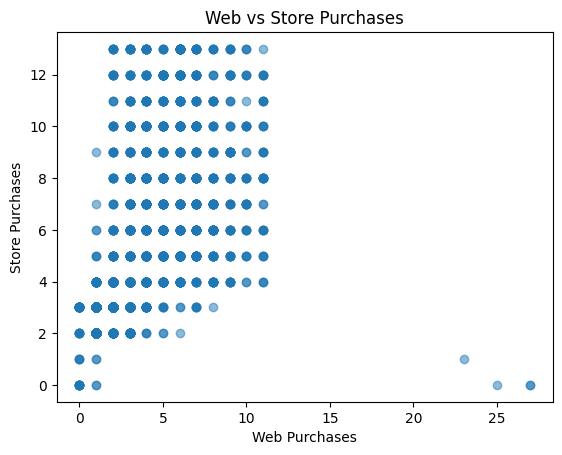

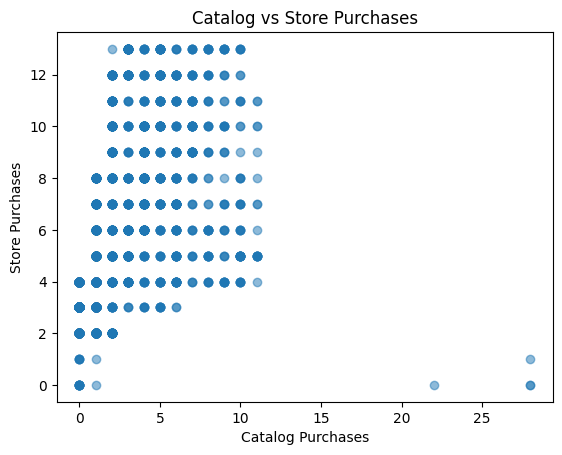

In [135]:
plt.scatter(df['NumWebPurchases'], df['NumStorePurchases'], alpha=0.5)
plt.xlabel('Web Purchases')
plt.ylabel('Store Purchases')
plt.title('Web vs Store Purchases')
plt.show()

plt.scatter(df['NumCatalogPurchases'], df['NumStorePurchases'], alpha=0.5)
plt.xlabel('Catalog Purchases')
plt.ylabel('Store Purchases')
plt.title('Catalog vs Store Purchases')
plt.show()


4. Does the US fare significantly better than the rest of the world in terms of total purchases?

In [136]:
us_purchases = df[df['Country'] == 'US']['Total_Purchase']
rest_purchases = df[df['Country'] != 'US']['Total_Purchase']

print("Mean purchases in US:", us_purchases.mean())
print("Mean purchases outside US:", rest_purchases.mean())


Mean purchases in US: 16.155963302752294
Mean purchases outside US: 14.795870483341155


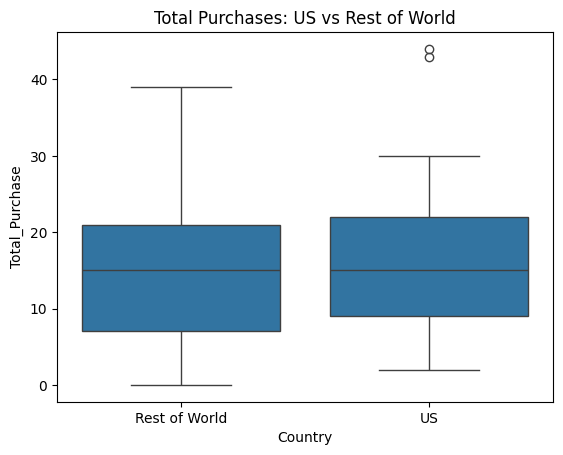

In [137]:
sns.boxplot(x=df['Country'].apply(lambda x: 'US' if x == 'US' else 'Rest of World'),y=df['Total_Purchase'])
plt.title("Total Purchases: US vs Rest of World")
plt.show()  

In [138]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(us_purchases, rest_purchases)
print(f"Mann-Whitney U test p-value: {p:.4f}")


Mann-Whitney U test p-value: 0.1140


The US mean is higher but not significant. The p value is greater than 0.05. The difference is not statistically significant

1. Which products are performing the best, and which are performing the least in terms of revenue?

In [139]:
product_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

product_revenue = df[product_cols].sum().sort_values(ascending=False)
print(product_revenue)


MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64


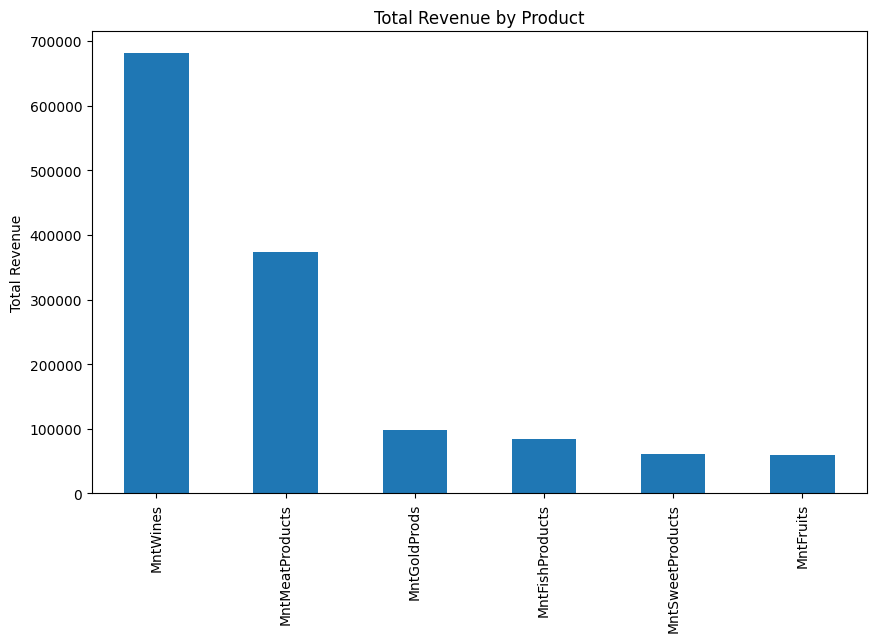

In [140]:
import matplotlib.pyplot as plt
product_revenue.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product')
plt.show()

Best is Wines and worst is fruits

2. Is there any pattern between the age of customers and the last campaign acceptance rate?

In [141]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,30,40,50,60,100], labels=['18-30','31-40','41-50','51-60','61+'])


In [142]:
acceptance_rate_by_agegroup = df.groupby('AgeGroup')['Response'].mean()
print(acceptance_rate_by_agegroup)


AgeGroup
18-30    0.178988
31-40    0.142857
41-50    0.146379
51-60    0.136842
61+      0.161654
Name: Response, dtype: float64


C:\Users\NESA\AppData\Local\Temp\ipykernel_14772\3647016811.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rate_by_agegroup = df.groupby('AgeGroup')['Response'].mean()


In [143]:
acceptance_rate_by_age = df.groupby('Age')['Response'].mean()


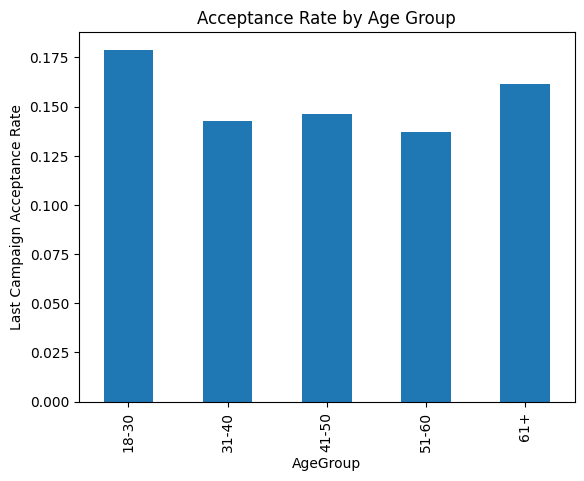

In [144]:
acceptance_rate_by_agegroup.plot(kind='bar')
plt.ylabel('Last Campaign Acceptance Rate')
plt.title('Acceptance Rate by Age Group')
plt.show()


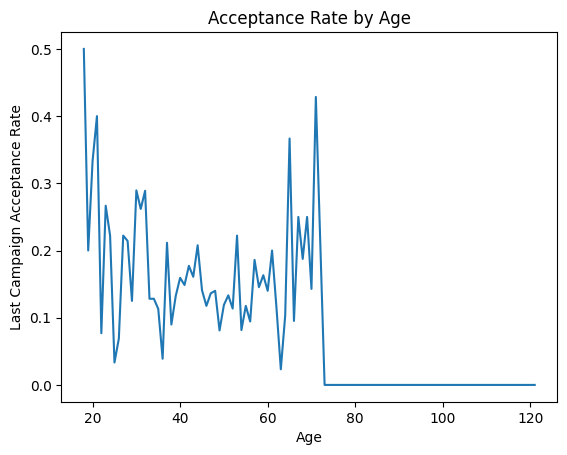

In [145]:
acceptance_rate_by_age.plot()
plt.xlabel('Age')
plt.ylabel('Last Campaign Acceptance Rate')
plt.title('Acceptance Rate by Age')
plt.show()


The younger population has higher acceptance rate

Which Country has the greatest number of customers who accepted the last campaign?

In [146]:
# Sum 'Response' for each country (since Response=1 means accepted)
country_acceptance = df.groupby('Country')['Response'].sum().sort_values(ascending=False)
print(country_acceptance)


Country
SP     176
SA      52
CA      38
AUS     23
GER     17
IND     13
US      13
ME       2
Name: Response, dtype: int64


In [147]:
top_country = country_acceptance.idxmax()
top_count = country_acceptance.max()
print(f"Country with greatest number of acceptances: {top_country} ({top_count})")


Country with greatest number of acceptances: SP (176)


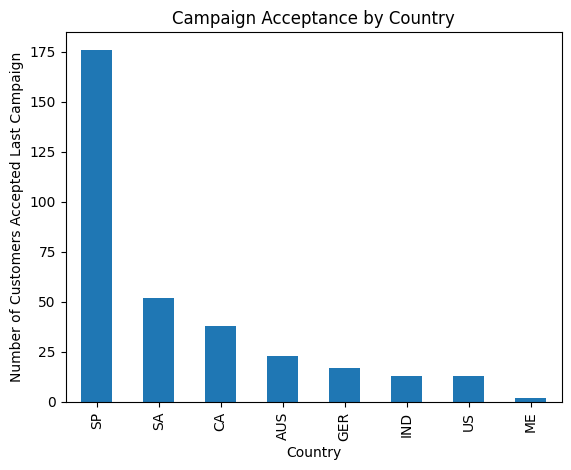

In [148]:
country_acceptance.plot(kind='bar')
plt.ylabel('Number of Customers Accepted Last Campaign')
plt.title('Campaign Acceptance by Country')
plt.show()


Top country with high acceptance is SP

4. Do you see any pattern in the no. of children at home and total spend?

In [151]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
# (Total_Spending should already be calculated)


In [153]:
children_vs_spend = df.groupby('Total_Children')['Total_Spendings'].mean()
print(children_vs_spend)


Total_Children
0    1106.029781
1     472.733156
2     245.947743
3     274.603774
Name: Total_Spendings, dtype: float64


In [154]:
print(df['Total_Children'].value_counts())


Total_Children
1    1128
0     638
2     421
3      53
Name: count, dtype: int64


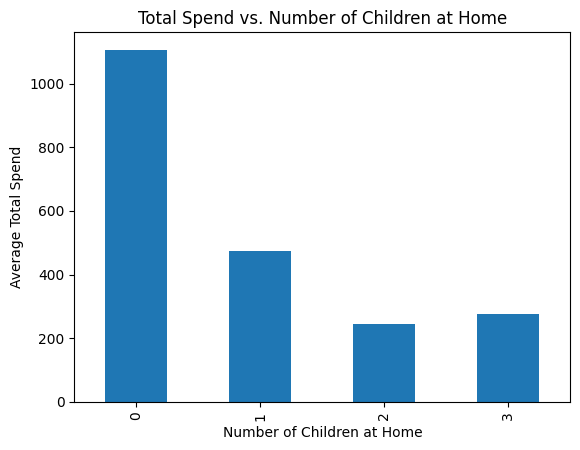

In [155]:
children_vs_spend.plot(kind='bar')
plt.xlabel('Number of Children at Home')
plt.ylabel('Average Total Spend')
plt.title('Total Spend vs. Number of Children at Home')
plt.show()


As the number of children increses the spending decreases

5. Education background of the customers who complained in the last 2 years

In [156]:
complainers = df[df['Complain'] == 1]


In [157]:
edu_counts = complainers['Education'].value_counts()
print(edu_counts)


Education
Graduation    14
2n Cycle       4
Master         2
PhD            1
Name: count, dtype: int64


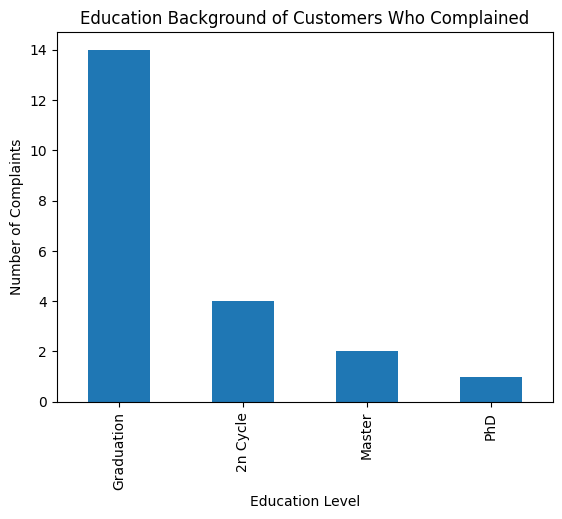

In [158]:
edu_counts.plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.title('Education Background of Customers Who Complained')
plt.show()


Max complaints from Graduates